In [ ]:
# LSTM

import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('covid1.csv')

In [ ]:
dataset.head()

,Date,Confirmed_cases
0,"24 January, 2020",0
1,"25 January, 2020",3
2,"26 January, 2020",4
3,"27 January, 2020",4
4,"28 January, 2020",4


In [ ]:
dataset.shape

(186, 2)

In [ ]:
covid1 = dataset['Confirmed_cases']
covid1.index = dataset['Date']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67D131C88>],
      dtype=object)

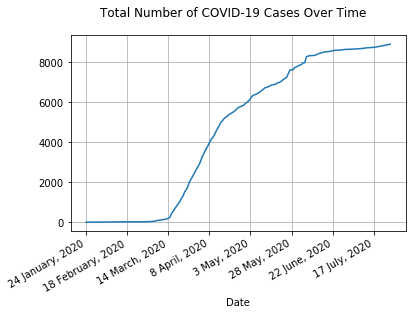

In [ ]:
covid1.plot(subplots=True, grid= True, title="Total Number of COVID-19 Cases Over Time")

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

In [ ]:
dataframe = read_csv('covid1.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

130 56


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Train on 115 samples, validate on 13 samples
Epoch 1/200
 - 1s - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.1784 - val_mean_squared_error: 0.1784
Epoch 2/200
 - 0s - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 3/200
 - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/200
 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 5.8361e-04 - val_mean_squared_error: 5.8361e-04
Epoch 5/200
 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 5.7602e-04 - val_mean_squared_error: 5.7602e-04
Epoch 6/200
 - 0s - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 7/200
 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 4.5388e-04 - val_mean_squared_error: 4.5388e-04
Epoch 8/200
 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 1.1051e-04 - val_mean_squared_error: 1.1051e-04
Epoch 9/200

 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 70/200
 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 71/200
 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 1.6754e-04 - val_mean_squared_error: 1.6754e-04
Epoch 72/200
 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 9.4230e-04 - val_mean_squared_error: 9.4230e-04
Epoch 73/200
 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 74/200
 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 75/200
 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 76/200
 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 9.9031e-04 - val_mean_squared_error: 9.9031e-04
Epoch 77/200
 - 0s - loss: 4.1783e-04 - mean_squared_error: 4.1783e-0

Epoch 138/200
 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 139/200
 - 0s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 140/200
 - 0s - loss: 5.7485e-04 - mean_squared_error: 5.7485e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 141/200
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.7490e-04 - val_mean_squared_error: 8.7490e-04
Epoch 142/200
 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 143/200
 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 7.5774e-04 - val_mean_squared_error: 7.5774e-04
Epoch 144/200
 - 0s - loss: 3.2600e-04 - mean_squared_error: 3.2600e-04 - val_loss: 7.0169e-04 - val_mean_squared_error: 7.0169e-04
Epoch 145/200
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 7.0846e-04 - val_mean_squared_error: 7.0846e-04
Epoch 146/200
 - 0s - lo

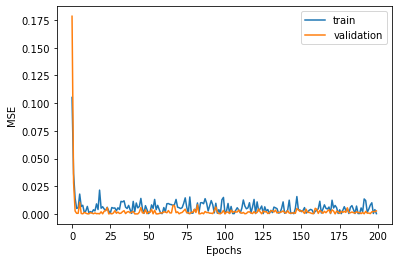

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(32, dropout=0.03, recurrent_dropout=0.03, return_sequences=True, input_shape=(1, look_back), name ="layer1"))
model.add(LSTM(64, dropout=0.08, recurrent_dropout=0.07, activation='relu', name ="layer2"))

model.add(Dense(1, activation = 'relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mean_squared_error']) #RMSProp
history = model.fit(trainX, trainY, validation_split=0.1, epochs=200, batch_size=1, verbose=2)

fig, ax = plt.subplots()

plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='validation')

plt.xlabel(xlabel ="Epochs")
plt.ylabel(ylabel ="MSE")

ax.legend()

plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 207.47 RMSE
Test Score: 712.15 RMSE


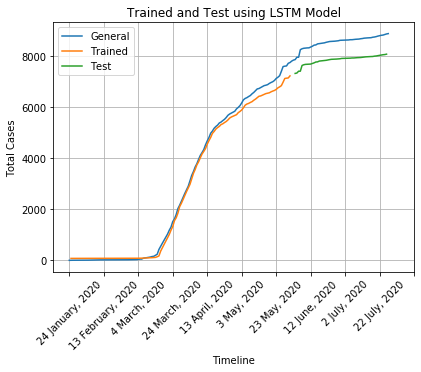

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

fig, ax = plt.subplots()

plt.plot(scaler.inverse_transform(dataset), label='General')
plt.plot(covid1.index, trainPredictPlot, label='Trained')
plt.plot(testPredictPlot, label='Test')

plt.tight_layout()
plt.xticks(rotation=45)
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

plt.xlabel(xlabel ="Timeline")
plt.ylabel(ylabel ="Total Cases")
plt.title("Trained and Test using LSTM Model")

ax.legend()
plt.grid()
plt.show()

In [ ]:
mse_result = history.history['mean_squared_error']

In [ ]:
for number, result in enumerate(mse_result):
    print(number, result)

0 0.10511264
1 0.036515765
2 0.014165436
3 0.0049814894
4 0.005605584
5 0.017949574
6 0.006704182
7 0.007861585
8 0.001410303
9 0.002701099
10 0.0068078004
11 0.0011397831
12 0.0021435348
13 0.0013238478
14 0.003775938
15 0.0027197637
16 0.009092178
17 0.0040228977
18 0.021515155
19 0.0051750615
20 0.006517424
21 0.0044768667
22 0.0030632515
23 0.0060519166
24 0.0026687668
25 0.00048980216
26 0.0058057825
27 0.005260882
28 0.0054257726
29 0.0028727774
30 0.005563849
31 0.0040608146
32 0.011365126
33 0.010928354
34 0.011870562
35 0.00611041
36 0.004919901
37 0.0077246465
38 0.0037369137
39 0.00054220576
40 0.011341859
41 0.0020252964
42 0.009893224
43 0.005484125
44 0.0067169634
45 0.014031156
46 0.004821854
47 0.00050102366
48 0.0074917977
49 0.003770631
50 0.00032850078
51 0.0018157406
52 0.00817264
53 0.0050110444
54 0.013120031
55 0.003868928
56 0.007762221
57 0.0039571305
58 0.00056111964
59 0.0003645322
60 0.0057852804
61 0.0020167474
62 0.009219937
63 0.009394573
64 0.008656899
6

In [ ]:
val_mse_result = history.history['val_mean_squared_error']

In [ ]:
for number, result in enumerate(val_mse_result):
    print(number, result)

0 0.17837050557136536
1 0.028322802856564522
2 0.0026534893549978733
3 0.0005836128257215023
4 0.00057602470042184
5 0.010582678951323032
6 0.0004538837820291519
7 0.00011050699686165899
8 0.001459007035009563
9 0.0007352352840825915
10 0.00015433478984050453
11 9.265526023227721e-05
12 0.0011355701135471463
13 0.000738941365852952
14 0.00021109086810611188
15 0.0009186221286654472
16 0.00025056625599972904
17 0.0003834467788692564
18 0.00012239694478921592
19 0.0019482270581647754
20 0.000125804464914836
21 0.002537428168579936
22 0.0030412126798182726
23 0.005686318501830101
24 4.8194840928772464e-05
25 0.0006254789186641574
26 4.7619039833080024e-05
27 0.0007980906520970166
28 0.0028882664628326893
29 0.0006475677946582437
30 0.0017112205969169736
31 0.00044721877202391624
32 0.0007168498123064637
33 0.0020366208627820015
34 0.0029422936495393515
35 0.0003446170885581523
36 0.001756009878590703
37 0.0021557644940912724
38 0.0009284786647185683
39 0.0016146301059052348
40 0.002305816

In [ ]:
""" This codes were adapted and inspired by https://machinelearningmastery.com/ """

' This codes were adapted and inspired by https://machinelearningmastery.com/ '